## Demo on the fusion of MCD43 and Sentinel 2

### UCL

#### Feng Yin

In the Fusion part, we have demonstate big changes with the using of PSF to get the regression between the S2 TOA reflectance and MCD43 adjusted to S2 sensing geometry. In this section, we will decmonstrate the optimization of PSF parameters and to try to get a generalised PSF parameters.

In [2]:
import sys
sys.path.insert(0, 'python')
import numpy as np
import gdal
import numpy.ma as ma
from spatial_mapping import mtile_cal,Find_corresponding_pixels
from read_s2_meta import readxml
from datetime import datetime
from glob import glob
from get_aeronet import Aeronet_measures
from scipy.stats import gaussian_kde

from mgrspy import mgrs as mg
import pylab as plt
%matplotlib inline

In [3]:
s2_l8_fil = np.loadtxt('AERO_S2_L8.txt', dtype=str)
for site, lat, lon, s2_dir_, _, l8_dir in s2_l8_fil:
    if s2_dir_ == s2_dir:
        this_site =  site, lat, lon, s2_dir_ 
    if (site == 'El_Arenosillo') or (site =='Cabo_da_Roca') or (site =='Murcia'):
        print site, lat, lon, s2_dir_ , l8_dir

El_Arenosillo 37.105 -6.733472 /home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2016/7/16/0/ LC08_L1TP_202034_20160716_20170323_01_T1
El_Arenosillo 37.105 -6.733472 /home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2016/10/4/0/ LC08_L1TP_202034_20161004_20170320_01_T1
El_Arenosillo 37.105 -6.733472 /home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2016/12/23/0/ LC08_L1TP_202034_20161223_20170315_01_T1
Cabo_da_Roca 38.783333 -9.5 /home/ucfafyi/DATA/S2_MODIS/s_data/29/S/MC/2016/3/24/0/ LC08_L1TP_204033_20160324_20170327_01_T1
Cabo_da_Roca 38.783333 -9.5 /home/ucfafyi/DATA/S2_MODIS/s_data/29/S/MC/2016/6/12/0/ LC08_L1TP_204033_20160612_20170324_01_T1
Cabo_da_Roca 38.783333 -9.5 /home/ucfafyi/DATA/S2_MODIS/s_data/29/S/MC/2016/6/19/0/ LC08_L1TP_205033_20160619_20170323_01_T1
Murcia 38.001 -1.1707 /home/ucfafyi/DATA/S2_MODIS/s_data/30/S/XH/2016/3/5/0/ LC08_L1TP_199033_20160305_20170328_01_T1
Murcia 38.001 -1.1707 /home/ucfafyi/DATA/S2_MODIS/s_data/30/S/XH/2016/3/5/0/ LC08_L1TP_199034_20160305_20170328_01_T1


In [22]:
# get a S2 scene 
# get the corresponding aeronet
# /home/ucfafyi/DATA/S2_MODIS/s_data/33/T/UL/2016/8/4/0/ a good example....
s2_dir = '/home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2017/9/4/0/'
aero_root = '/home/ucfafyi/DATA/Multiply/Aeronet/'
root = '/home/ucfafyi/DATA/S2_MODIS/'
m_dir = root + 'm_data/'
s2_files = np.loadtxt('data/s2_files.txt', dtype=str)

h,v = mtile_cal(38.001, -1.1707)

this_site = None
for site, lat, lon, s2_dir_ in s2_files:
    if s2_dir_ == s2_dir:
        this_site =  site, lat, lon, s2_dir_ 
    if  (site =='Murcia'):
        #print site, lat, lon, s2_dir_
        date = '-'.join(s2_dir_.split('/')[-5:-2])
        y_m_d = datetime.strptime(date, '%Y-%m-%d')
        doy = y_m_d.timetuple().tm_yday

        m_file = glob(m_dir+'MCD43A1.A%d%03d.h%02dv%02d.006.*.hdf'%(y_m_d.year, doy,h,v))
        if len(m_file)>0:
            print  '%s-%02d-%02d'%(s2_dir_.split('/')[-5], int(s2_dir_.split('/')[-4]), int(s2_dir_.split('/')[-3]) ), m_file[0].split('/')[6]
        #print this_site
        else:
            pass

2016-01-05 MCD43A1.A2016005.h17v05.006.2016174093912.hdf
2016-01-12 MCD43A1.A2016012.h17v05.006.2016174125225.hdf
2016-01-25 MCD43A1.A2016025.h17v05.006.2016174180638.hdf
2016-02-04 MCD43A1.A2016035.h17v05.006.2016174215107.hdf
2016-03-05 MCD43A1.A2016065.h17v05.006.2016175083450.hdf
2016-03-12 MCD43A1.A2016072.h17v05.006.2016179131736.hdf
2016-03-25 MCD43A1.A2016085.h17v05.006.2016179174537.hdf
2016-04-01 MCD43A1.A2016092.h17v05.006.2016179193448.hdf
2016-04-14 MCD43A1.A2016105.h17v05.006.2016180142550.hdf
2016-04-21 MCD43A1.A2016112.h17v05.006.2016180165856.hdf
2016-04-24 MCD43A1.A2016115.h17v05.006.2016180180101.hdf
2016-05-01 MCD43A1.A2016122.h17v05.006.2016180203734.hdf
2016-05-21 MCD43A1.A2016142.h17v05.006.2016181012830.hdf
2016-05-24 MCD43A1.A2016145.h17v05.006.2016181020803.hdf
2016-06-10 MCD43A1.A2016162.h17v05.006.2016202204507.hdf
2016-06-13 MCD43A1.A2016165.h17v05.006.2016202221317.hdf
2016-06-20 MCD43A1.A2016172.h17v05.006.2016203002832.hdf
2016-06-23 MCD43A1.A2016175.h17

El_Arenosillo (37.105, -6.733472) ('2017-9-4', '/home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2017/9/4/0/') (17, 5, 247, '/home/ucfafyi/DATA/S2_MODIS/m_data/MCD43A1.A2017247.h17v05.006.2017256031007.hdf')
Second order =  0.0379367038862
First order =  0.0462133571715


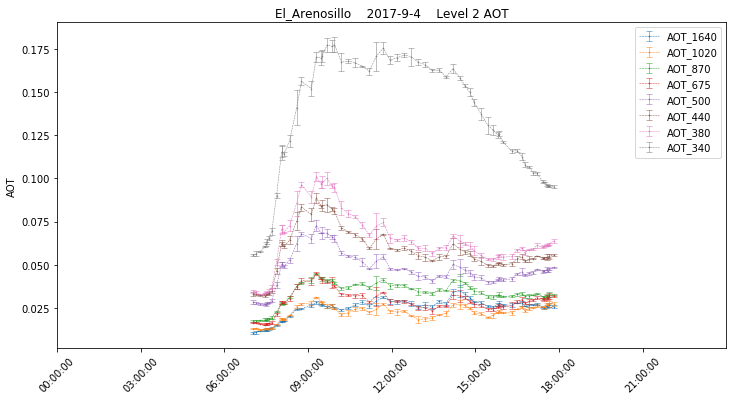

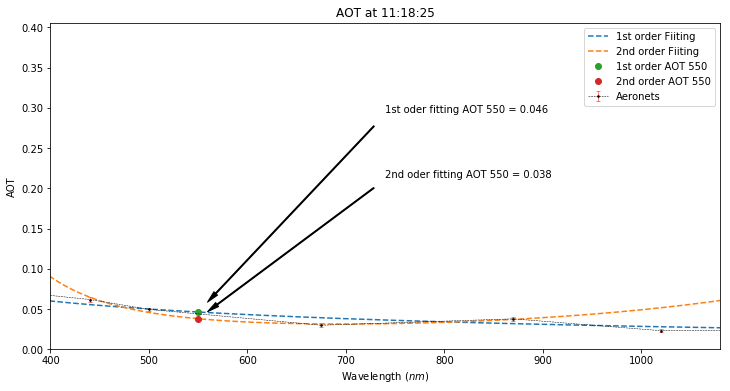

In [23]:
date = '-'.join(s2_dir.split('/')[-5:-2])
this_site = 'El_Arenosillo', 37.105, -6.733472,'/home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2017/9/4/0/'
y_m_d = datetime.strptime(date, '%Y-%m-%d')
doy = y_m_d.timetuple().tm_yday


site, lat, lon, s2_dir = this_site
h,v = mtile_cal(float(lat), float(lon))
m_file = glob(m_dir+'MCD43A1.A%d%03d.h%02dv%02d.006.*.hdf'%(y_m_d.year, doy,h,v))
print site, (float(lat), float(lon)), (date, s2_dir), (h, v, doy,  m_file[0])
with open(s2_dir+'tileInfo.json', 'rb') as f:
    for line in f:
        if 'timestamp' in line:
            h,m,s =  line.split('T')[-1].split('Z')[0].split(':')
            time = float(h)+ float(m)/60.+float(s)/3600.
s,f = Aeronet_measures(site, date, time, root=aero_root, plot_all=1)
plt.xlim(400, 1080)
print 'Second order = ', s[0]
print 'First order = ',f[0]

In [16]:
ls /home/ucfafyi/DATA/S2_MODIS/s_data/33/T/UL/2016/8/4/0

10meter.vrt  B02.jp2  B06.jp2  B10.jp2  cloud.tiff    productInfo.json
20meter.vrt  B03.jp2  B07.jp2  B11.jp2  metadata.xml  qi/
60meter.vrt  B04.jp2  B08.jp2  B12.jp2  preview.jp2   tileInfo.json
B01.jp2      B05.jp2  B09.jp2  B8A.jp2  preview.jpg


In [17]:
# we can use the vrt file created with gdalbuildvrt
# to easily create memmap for fater IO
bands = 'B02', 'B03', 'B04', 'B08', 'B11', 'B12', 'B8A'
g = gdal.Open(s2_dir+'10meter.vrt')
data= g.GetVirtualMemArray()
b2,b3,b4,b8 = data
g1 = gdal.Open(s2_dir+'20meter.vrt')
data1 = g1.GetVirtualMemArray()
b8a, b11, b12 = data1[-3:,:,:]
bands = 'B02', 'B03', 'B04', 'B08', 'B11', 'B12', 'B8A'
img = dict(zip(bands, [b2,b3,b4,b8, b8a, b11, b12]))

In [18]:
rgb = np.array([img['B04'],img['B03'],img['B02']]).transpose(1,2,0)*0.0001

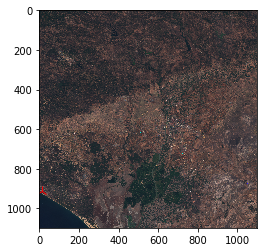

In [19]:
aero_mg = mg.toMgrs(float(lat), float(lon), precision=4)
aero_mg_y, aero_mg_x = int(aero_mg[-8:-4]), int(aero_mg[-4:])
plt.imshow(rgb[::10,::10]*2, interpolation='None')
plt.plot(aero_mg_y/10., (10000-aero_mg_x)/10., 'r2', ms=10) # aeronet site

A wraped class for optimization of PSF parameters.

In [163]:
from functools import partial
import numpy as np
import gdal
import scipy
from scipy import ndimage, signal, optimize
from mgrspy import mgrs as mg 
from multi_process import parmap
from cloud import classification
from get_brdf import get_brdf_six
from spatial_mapping import mtile_cal,Find_corresponding_pixels
from read_s2_meta import readxml
from datetime import datetime
from spatial_mapping import mtile_cal,Find_corresponding_pixels, cloud_dilation
from create_training_set import create_training_set
from glob import glob

class PSF_optimize(object):
    def __init__(self, s2_dir=None, m_fname=None, patch = np.array([0,0,10980, 10980]), qa_thresh=2):
        
        self.s2_dir = s2_dir
        self.Lfile = m_fname
        self.patch = patch
        self.bands = 'B02', 'B03', 'B04', 'B08', 'B11', 'B12', 'B8A'
        self.slop = 0.95607605898444503
        self.off =  0.0086119174434039214
        self.parameters = ['xstd', 'ystd', 'angle', 'xs', 'ys']
        self.qa_thresh = qa_thresh
        
    def S2_PSF_optimization(self,):

        
        # open the created vrt file with 10 meter, 20 meter and 60 meter 
        # grouped togehter and use gdal memory map to open it
        g = gdal.Open(self.s2_dir+'10meter.vrt')
        data= g.GetVirtualMemArray()
        b2,b3,b4,b8 = data
        g1 = gdal.Open(self.s2_dir+'20meter.vrt')
        data1 = g1.GetVirtualMemArray()
        b8a, b11, b12 = data1[-3:,:,:]
        img = dict(zip(self.bands, [b2,b3,b4,b8, b11, b12, b8a]))
        
        if glob(self.s2_dir+'cloud.tiff')==[]:
            cl = classification(img = img)
            cl.Get_cm_p()
            g=None; g1=None
            self.cloud = cl.cm
            g = gdal.Open(self.s2_dir+'B04.jp2')
            driver = gdal.GetDriverByName('GTiff')
            g1 = driver.Create(self.s2_dir+'cloud.tiff', g.RasterXSize, g.RasterYSize, 1, gdal.GDT_Byte)

            projection   = g.GetProjection()
            geotransform = g.GetGeoTransform()
            g1.SetGeoTransform( geotransform )
            g1.SetProjection( projection )
            gcp_count = g.GetGCPs()
            if gcp_count != 0:
                g1.SetGCPs( gcp_count, g.GetGCPProjection() )
            g1.GetRasterBand(1).WriteArray(self.cloud)
            g1=None; g=None
            del cl
        else:
            self.cloud = cloud = gdal.Open(self.s2_dir+'cloud.tiff').ReadAsArray().astype(bool)
        cloud_cover = 1.*self.cloud.sum()/self.cloud.size
        cloud_cover = 1.*self.cloud.sum()/self.cloud.size
        if cloud_cover > 0.2:  
            print 'Too much cloud, cloud proportion: %.03f !!'%cloud_cover
            return []
        else:
        
            mete = readxml('%smetadata.xml'%self.s2_dir)
            self.sza = np.zeros(7)
            self.sza[:] = mete['mSz']
            self.saa = self.sza.copy()
            self.saa[:] = mete['mSa']
            try:
                self.vza = (mete['mVz'])[[1,2,3,7,11,12,8],]
                self.vaa = (mete['mVa'])[[1,2,3,7,11,12,8],]
            except:   
                self.vza = np.repeat(np.nanmean(mete['mVz']), 7)
                self.vaa = np.repeat(np.nanmean(mete['mVa']), 7)
            self.angles = (self.sza, self.vza,  (self.vaa - self.saa))
            

            tiles = Find_corresponding_pixels(self.s2_dir+'B04.jp2', destination_res=500)
            self.h,self.v = int(self.Lfile.split('.')[-4][1:3]), int(self.Lfile.split('.')[-4][4:])
            self.H_inds, self.L_inds = tiles['h%02dv%02d'%(self.h, self.v)]
            self.Lx, self.Ly = self.L_inds
            self.Hx, self.Hy = self.H_inds
            
            angles = (self.sza[-2], self.vza[-2], (self.vaa - self.saa)[-2])
            self.brdf, self.qa = get_brdf_six(self.Lfile, angles=angles, bands=(7,), Linds=list(self.L_inds))
            self.brdf, self.qa = self.brdf.flatten(), self.qa.flatten()
            
            # convolve band 12 using the generally used PSF value
            self.H_data = np.repeat(np.repeat(b12, 2, axis=1), 2, axis=0)
            size = 2*int(round(max(1.96*50, 1.96*50)))# set the largest possible PSF size
            self.H_data[0,:]=self.H_data[-1,:]=self.H_data[:,0]=self.H_data[:,-1]=0
            self.bad_pixs = cloud_dilation( (self.H_data <= 0) | self.cloud , iteration=size/2) 
            xstd, ystd = 29.75, 39
            ker = self.gaussian(xstd, ystd, 0)
            self.conved = signal.fftconvolve(self.H_data, ker, mode='same')
            
            m_mask = np.all(~self.brdf.mask,axis=0 ) & np.all(self.qa<=self.qa_thresh, axis=0)
            s_mask = ~self.bad_pixs[self.Hx, self.Hy]
            self.ms_mask = s_mask & m_mask
            
            
            '''self.in_patch_m = np.logical_and.reduce(((self.Hx>=self.patch[1]),
                                                    (self.Hx<=(self.patch[1]+self.patch[3])), 
                                                    (self.Hy>=self.patch[0]),
                                                    (self.Hy<=(self.patch[0]+self.patch[2]))))
            
            self.patch_s2_ind = self.Hx[self.in_patch_m]-self.patch[1], self.Hy[self.in_patch_m]-self.patch[0]
            self.patch_mod = self.brdf[self.in_patch_m]
            self.patch_qa = self.qa[self.in_patch_m]
'''

    def gaussian(self, xstd, ystd, angle, norm = True):
        win = 2*int(round(max(1.96*xstd, 1.96*ystd)))
        winx = int(round(win*(2**0.5)))
        winy = int(round(win*(2**0.5)))
        xgaus = signal.gaussian(winx, xstd)
        ygaus = signal.gaussian(winy, ystd)
        gaus  = np.outer(xgaus, ygaus)
        r_gaus = ndimage.interpolation.rotate(gaus, angle, reshape=True)
        center = np.array(r_gaus.shape)/2
        cgaus = r_gaus[center[0]-win/2: center[0]+win/2, center[1]-win/2:center[1]+win/2]
        if norm:
            return cgaus/cgaus.sum()
        else:
            return cgaus 


    def gaus_optimize(self, p0):
        return optimize.fmin_l_bfgs_b(self.gaus_cost, p0, approx_grad=1, iprint=-1,
                                      bounds=self.bounds,maxiter=10, maxfun=10)         


    def shift_optimize(self, p0):
        return optimize.fmin(self.shift_cost, p0, full_output=1, maxiter=100, maxfun=150, disp=0)


    def gaus_cost(self, para):
        # cost for a final psf optimization
        xstd,ystd,angle, xs, ys = para 
        ker = self.gaussian(xstd,ystd,angle,True)                              
        conved = signal.fftconvolve(self.H_data, ker, mode='same')
        # mask bad pixels
        cos = self.cost(xs=xs, ys=ys, conved=conved)
        return cos


    def shift_cost(self, shifts):
        # cost with different shits
        xs, ys = shifts
        cos = self.cost(xs=xs, ys=ys, conved=self.conved)
        return cos


    def cost(self, xs=None, ys=None, conved = None):
        # a common cost function can be reused
        shifted_mask = np.logical_and.reduce(((self.Hx+int(xs)>=self.patch[1]),
                                              (self.Hx+int(xs)<(self.patch[1]+self.patch[3])), 
                                              (self.Hy+int(ys)>=self.patch[0]),
                                              (self.Hy+int(ys)<(self.patch[0]+self.patch[2]))))
        mask = self.ms_mask & shifted_mask
        x_ind, y_ind = self.Hx + int(xs)- self.patch[1], self.Hy + int(ys) - self.patch[0]
        sb12, mb12 = conved[x_ind[mask], y_ind[mask]], self.brdf[mask]
        m_fed, s_fed = self.slop*mb12+self.off, sb12*0.0001
        try:
            r = scipy.stats.linregress(m_fed, s_fed)
            cost = abs(1-r.rvalue)
        except:
            cost = 100000000000
        return cost


    def fire_shift_optimize(self,):
        #self.S2_PSF_optimization()
        min_val = [-50,-50]
        max_val = [50,50]
        ps, distributions = create_training_set([ 'xs', 'ys'], min_val, max_val, n_train=50)
        self.shift_solved = parmap(self.shift_optimize, ps, nprocs=10)    
        self.paras, self.costs = np.array([i[0] for i in self.shift_solved]),np.array([i[1] for i in self.shift_solved])
        xs, ys = self.paras[self.costs==self.costs.min()][0].astype(int)
        print 'Best shift is ', xs, ys, 'with the correlation of', 1-self.costs.min()
        return xs, ys


    def fire_gaus_optimize(self,):
        xs, ys = self.fire_shift_optimize()
        if self.costs.min()<0.1:
            min_val = [12,12, -15,xs-2,ys-2]
            max_val = [50,50, 15, xs+2,ys+2]
            self.bounds = [12,50],[12,50],[-15,15],[xs-2,xs+2],[ys-2, ys+2]

            ps, distributions = create_training_set(self.parameters, min_val, max_val, n_train=50)
            print 'Start solving...'
            self.gaus_solved = parmap(self.gaus_optimize, ps, nprocs=5)
            result = np.array([np.hstack((i[0], i[1])) for i in  self.gaus_solved])
            print 'solved psf', dict(zip(self.parameters+['cost',],result[np.argmin(result[:,-1])]))
            return result[np.argmin(result[:,-1]),:]
        else:
            print 'Cost is too large, plese check!'
            return []
from functools import partial
import numpy as np
import gdal
import scipy
from scipy import ndimage, signal, optimize
from mgrspy import mgrs as mg 
from multi_process import parmap
from cloud import classification
from get_brdf import get_brdf_six
from spatial_mapping import mtile_cal,Find_corresponding_pixels
from read_s2_meta import readxml
from datetime import datetime
from spatial_mapping import mtile_cal,Find_corresponding_pixels, cloud_dilation
from create_training_set import create_training_set
from glob import glob

class PSF_optimize(object):
    def __init__(self, s2_dir=None, m_fname=None, patch = np.array([0,0,10980, 10980]), qa_thresh=2):
        
        self.s2_dir = s2_dir
        self.Lfile = m_fname
        self.patch = patch
        self.bands = 'B02', 'B03', 'B04', 'B08', 'B11', 'B12', 'B8A'
        self.slop = 0.95607605898444503
        self.off =  0.0086119174434039214
        self.parameters = ['xstd', 'ystd', 'angle', 'xs', 'ys']
        self.qa_thresh = qa_thresh
        
    def S2_PSF_optimization(self,):

        
        # open the created vrt file with 10 meter, 20 meter and 60 meter 
        # grouped togehter and use gdal memory map to open it
        g = gdal.Open(self.s2_dir+'10meter.vrt')
        data= g.GetVirtualMemArray()
        b2,b3,b4,b8 = data
        g1 = gdal.Open(self.s2_dir+'20meter.vrt')
        data1 = g1.GetVirtualMemArray()
        b8a, b11, b12 = data1[-3:,:,:]
        img = dict(zip(self.bands, [b2,b3,b4,b8, b11, b12, b8a]))
        
        if glob(self.s2_dir+'cloud.tiff')==[]:
            cl = classification(img = img)
            cl.Get_cm_p()
            g=None; g1=None
            self.cloud = cl.cm
            g = gdal.Open(self.s2_dir+'B04.jp2')
            driver = gdal.GetDriverByName('GTiff')
            g1 = driver.Create(self.s2_dir+'cloud.tiff', g.RasterXSize, g.RasterYSize, 1, gdal.GDT_Byte)

            projection   = g.GetProjection()
            geotransform = g.GetGeoTransform()
            g1.SetGeoTransform( geotransform )
            g1.SetProjection( projection )
            gcp_count = g.GetGCPs()
            if gcp_count != 0:
                g1.SetGCPs( gcp_count, g.GetGCPProjection() )
            g1.GetRasterBand(1).WriteArray(self.cloud)
            g1=None; g=None
            del cl
        else:
            self.cloud = cloud = gdal.Open(self.s2_dir+'cloud.tiff').ReadAsArray().astype(bool)
        cloud_cover = 1.*self.cloud.sum()/self.cloud.size
        cloud_cover = 1.*self.cloud.sum()/self.cloud.size
        if cloud_cover > 0.2:  
            print 'Too much cloud, cloud proportion: %.03f !!'%cloud_cover
            return []
        else:
        
            mete = readxml('%smetadata.xml'%self.s2_dir)
            self.sza = np.zeros(7)
            self.sza[:] = mete['mSz']
            self.saa = self.sza.copy()
            self.saa[:] = mete['mSa']
            try:
                self.vza = (mete['mVz'])[[1,2,3,7,11,12,8],]
                self.vaa = (mete['mVa'])[[1,2,3,7,11,12,8],]
            except:   
                self.vza = np.repeat(np.nanmean(mete['mVz']), 7)
                self.vaa = np.repeat(np.nanmean(mete['mVa']), 7)
            self.angles = (self.sza, self.vza,  (self.vaa - self.saa))
            

            tiles = Find_corresponding_pixels(self.s2_dir+'B04.jp2', destination_res=500)
            self.h,self.v = int(self.Lfile.split('.')[-4][1:3]), int(self.Lfile.split('.')[-4][4:])
            self.H_inds, self.L_inds = tiles['h%02dv%02d'%(self.h, self.v)]
            self.Lx, self.Ly = self.L_inds
            self.Hx, self.Hy = self.H_inds
            
            angles = (self.sza[-2], self.vza[-2], (self.vaa - self.saa)[-2])
            self.brdf, self.qa = get_brdf_six(self.Lfile, angles=angles, bands=(7,), Linds=list(self.L_inds))
            self.brdf, self.qa = self.brdf.flatten(), self.qa.flatten()
            
            # convolve band 12 using the generally used PSF value
            self.H_data = np.repeat(np.repeat(b12, 2, axis=1), 2, axis=0)
            size = 2*int(round(max(1.96*50, 1.96*50)))# set the largest possible PSF size
            self.H_data[0,:]=self.H_data[-1,:]=self.H_data[:,0]=self.H_data[:,-1]=0
            self.bad_pixs = cloud_dilation( (self.H_data <= 0) | self.cloud , iteration=size/2) 
            xstd, ystd = 29.75, 39
            ker = self.gaussian(xstd, ystd, 0)
            self.conved = signal.fftconvolve(self.H_data, ker, mode='same')
            
            m_mask = np.all(~self.brdf.mask,axis=0 ) & np.all(self.qa<=self.qa_thresh, axis=0)
            s_mask = ~self.bad_pixs[self.Hx, self.Hy]
            self.ms_mask = s_mask & m_mask
            
            
            '''self.in_patch_m = np.logical_and.reduce(((self.Hx>=self.patch[1]),
                                                    (self.Hx<=(self.patch[1]+self.patch[3])), 
                                                    (self.Hy>=self.patch[0]),
                                                    (self.Hy<=(self.patch[0]+self.patch[2]))))
            
            self.patch_s2_ind = self.Hx[self.in_patch_m]-self.patch[1], self.Hy[self.in_patch_m]-self.patch[0]
            self.patch_mod = self.brdf[self.in_patch_m]
            self.patch_qa = self.qa[self.in_patch_m]
'''

    def gaussian(self, xstd, ystd, angle, norm = True):
        win = 2*int(round(max(1.96*xstd, 1.96*ystd)))
        winx = int(round(win*(2**0.5)))
        winy = int(round(win*(2**0.5)))
        xgaus = signal.gaussian(winx, xstd)
        ygaus = signal.gaussian(winy, ystd)
        gaus  = np.outer(xgaus, ygaus)
        r_gaus = ndimage.interpolation.rotate(gaus, angle, reshape=True)
        center = np.array(r_gaus.shape)/2
        cgaus = r_gaus[center[0]-win/2: center[0]+win/2, center[1]-win/2:center[1]+win/2]
        if norm:
            return cgaus/cgaus.sum()
        else:
            return cgaus 


    def gaus_optimize(self, p0):
        return optimize.fmin_l_bfgs_b(self.gaus_cost, p0, approx_grad=1, iprint=-1,
                                      bounds=self.bounds,maxiter=10, maxfun=10)         


    def shift_optimize(self, p0):
        return optimize.fmin(self.shift_cost, p0, full_output=1, maxiter=100, maxfun=150, disp=0)


    def gaus_cost(self, para):
        # cost for a final psf optimization
        xstd,ystd,angle, xs, ys = para 
        ker = self.gaussian(xstd,ystd,angle,True)                              
        conved = signal.fftconvolve(self.H_data, ker, mode='same')
        # mask bad pixels
        cos = self.cost(xs=xs, ys=ys, conved=conved)
        return cos


    def shift_cost(self, shifts):
        # cost with different shits
        xs, ys = shifts
        cos = self.cost(xs=xs, ys=ys, conved=self.conved)
        return cos


    def cost(self, xs=None, ys=None, conved = None):
        # a common cost function can be reused
        shifted_mask = np.logical_and.reduce(((self.Hx+int(xs)>=self.patch[1]),
                                              (self.Hx+int(xs)<(self.patch[1]+self.patch[3])), 
                                              (self.Hy+int(ys)>=self.patch[0]),
                                              (self.Hy+int(ys)<(self.patch[0]+self.patch[2]))))
        mask = self.ms_mask & shifted_mask
        x_ind, y_ind = self.Hx + int(xs)- self.patch[1], self.Hy + int(ys) - self.patch[0]
        sb12, mb12 = conved[x_ind[mask], y_ind[mask]], self.brdf[mask]
        m_fed, s_fed = self.slop*mb12+self.off, sb12*0.0001
        try:
            r = scipy.stats.linregress(m_fed, s_fed)
            cost = abs(1-r.rvalue)
        except:
            cost = 100000000000
        return cost


    def fire_shift_optimize(self,):
        #self.S2_PSF_optimization()
        min_val = [-50,-50]
        max_val = [50,50]
        ps, distributions = create_training_set([ 'xs', 'ys'], min_val, max_val, n_train=50)
        self.shift_solved = parmap(self.shift_optimize, ps, nprocs=10)    
        self.paras, self.costs = np.array([i[0] for i in self.shift_solved]),np.array([i[1] for i in self.shift_solved])
        xs, ys = self.paras[self.costs==self.costs.min()][0].astype(int)
        print 'Best shift is ', xs, ys, 'with the correlation of', 1-self.costs.min()
        return xs, ys


    def fire_gaus_optimize(self,):
        xs, ys = self.fire_shift_optimize()
        if self.costs.min()<0.1:
            min_val = [12,12, -15,xs-2,ys-2]
            max_val = [50,50, 15, xs+2,ys+2]
            self.bounds = [12,50],[12,50],[-15,15],[xs-2,xs+2],[ys-2, ys+2]

            ps, distributions = create_training_set(self.parameters, min_val, max_val, n_train=50)
            print 'Start solving...'
            self.gaus_solved = parmap(self.gaus_optimize, ps, nprocs=5)
            result = np.array([np.hstack((i[0], i[1])) for i in  self.gaus_solved])
            print 'solved psf', dict(zip(self.parameters+['cost',],result[np.argmin(result[:,-1])]))
            return result[np.argmin(result[:,-1]),:]
        else:
            print 'Cost is too large, plese check!'
            return []
from functools import partial
import numpy as np
import gdal
import scipy
from scipy import ndimage, signal, optimize
from mgrspy import mgrs as mg 
from multi_process import parmap
from cloud import classification
from get_brdf import get_brdf_six
from spatial_mapping import mtile_cal,Find_corresponding_pixels
from read_s2_meta import readxml
from datetime import datetime
from spatial_mapping import mtile_cal,Find_corresponding_pixels, cloud_dilation
from create_training_set import create_training_set
from glob import glob

class PSF_optimize(object):
    def __init__(self, s2_dir=None, m_fname=None, patch = np.array([0,0,10980, 10980]), qa_thresh=2):
        
        self.s2_dir = s2_dir
        self.Lfile = m_fname
        self.patch = patch
        self.bands = 'B02', 'B03', 'B04', 'B08', 'B11', 'B12', 'B8A'
        self.slop = 0.95607605898444503
        self.off =  0.0086119174434039214
        self.parameters = ['xstd', 'ystd', 'angle', 'xs', 'ys']
        self.qa_thresh = qa_thresh
        
    def S2_PSF_optimization(self,):

        
        # open the created vrt file with 10 meter, 20 meter and 60 meter 
        # grouped togehter and use gdal memory map to open it
        g = gdal.Open(self.s2_dir+'10meter.vrt')
        data= g.GetVirtualMemArray()
        b2,b3,b4,b8 = data
        g1 = gdal.Open(self.s2_dir+'20meter.vrt')
        data1 = g1.GetVirtualMemArray()
        b8a, b11, b12 = data1[-3:,:,:]
        img = dict(zip(self.bands, [b2,b3,b4,b8, b11, b12, b8a]))
        
        if glob(self.s2_dir+'cloud.tiff')==[]:
            cl = classification(img = img)
            cl.Get_cm_p()
            g=None; g1=None
            self.cloud = cl.cm
            g = gdal.Open(self.s2_dir+'B04.jp2')
            driver = gdal.GetDriverByName('GTiff')
            g1 = driver.Create(self.s2_dir+'cloud.tiff', g.RasterXSize, g.RasterYSize, 1, gdal.GDT_Byte)

            projection   = g.GetProjection()
            geotransform = g.GetGeoTransform()
            g1.SetGeoTransform( geotransform )
            g1.SetProjection( projection )
            gcp_count = g.GetGCPs()
            if gcp_count != 0:
                g1.SetGCPs( gcp_count, g.GetGCPProjection() )
            g1.GetRasterBand(1).WriteArray(self.cloud)
            g1=None; g=None
            del cl
        else:
            self.cloud = cloud = gdal.Open(self.s2_dir+'cloud.tiff').ReadAsArray().astype(bool)
        cloud_cover = 1.*self.cloud.sum()/self.cloud.size
        cloud_cover = 1.*self.cloud.sum()/self.cloud.size
        if cloud_cover > 0.2:  
            print 'Too much cloud, cloud proportion: %.03f !!'%cloud_cover
            return []
        else:
        
            mete = readxml('%smetadata.xml'%self.s2_dir)
            self.sza = np.zeros(7)
            self.sza[:] = mete['mSz']
            self.saa = self.sza.copy()
            self.saa[:] = mete['mSa']
            try:
                self.vza = (mete['mVz'])[[1,2,3,7,11,12,8],]
                self.vaa = (mete['mVa'])[[1,2,3,7,11,12,8],]
            except:   
                self.vza = np.repeat(np.nanmean(mete['mVz']), 7)
                self.vaa = np.repeat(np.nanmean(mete['mVa']), 7)
            self.angles = (self.sza, self.vza,  (self.vaa - self.saa))
            

            tiles = Find_corresponding_pixels(self.s2_dir+'B04.jp2', destination_res=500)
            self.h,self.v = int(self.Lfile.split('.')[-4][1:3]), int(self.Lfile.split('.')[-4][4:])
            self.H_inds, self.L_inds = tiles['h%02dv%02d'%(self.h, self.v)]
            self.Lx, self.Ly = self.L_inds
            self.Hx, self.Hy = self.H_inds
            
            angles = (self.sza[-2], self.vza[-2], (self.vaa - self.saa)[-2])
            self.brdf, self.qa = get_brdf_six(self.Lfile, angles=angles, bands=(7,), Linds=list(self.L_inds))
            self.brdf, self.qa = self.brdf.flatten(), self.qa.flatten()
            
            # convolve band 12 using the generally used PSF value
            self.H_data = np.repeat(np.repeat(b12, 2, axis=1), 2, axis=0)
            size = 2*int(round(max(1.96*50, 1.96*50)))# set the largest possible PSF size
            self.H_data[0,:]=self.H_data[-1,:]=self.H_data[:,0]=self.H_data[:,-1]=0
            self.bad_pixs = cloud_dilation( (self.H_data <= 0) | self.cloud , iteration=size/2) 
            xstd, ystd = 29.75, 39
            ker = self.gaussian(xstd, ystd, 0)
            self.conved = signal.fftconvolve(self.H_data, ker, mode='same')
            
            m_mask = np.all(~self.brdf.mask,axis=0 ) & np.all(self.qa<=self.qa_thresh, axis=0)
            s_mask = ~self.bad_pixs[self.Hx, self.Hy]
            self.ms_mask = s_mask & m_mask

    def gaussian(self, xstd, ystd, angle, norm = True):
        win = 2*int(round(max(1.96*xstd, 1.96*ystd)))
        winx = int(round(win*(2**0.5)))
        winy = int(round(win*(2**0.5)))
        xgaus = signal.gaussian(winx, xstd)
        ygaus = signal.gaussian(winy, ystd)
        gaus  = np.outer(xgaus, ygaus)
        r_gaus = ndimage.interpolation.rotate(gaus, angle, reshape=True)
        center = np.array(r_gaus.shape)/2
        cgaus = r_gaus[center[0]-win/2: center[0]+win/2, center[1]-win/2:center[1]+win/2]
        if norm:
            return cgaus/cgaus.sum()
        else:
            return cgaus 


    def gaus_optimize(self, p0):
        return optimize.fmin_l_bfgs_b(self.gaus_cost, p0, approx_grad=1, iprint=-1,
                                      bounds=self.bounds,maxiter=10, maxfun=10)         


    def shift_optimize(self, p0):
        return optimize.fmin(self.shift_cost, p0, full_output=1, maxiter=100, maxfun=150, disp=0)


    def gaus_cost(self, para):
        # cost for a final psf optimization
        xstd,ystd,angle, xs, ys = para 
        ker = self.gaussian(xstd,ystd,angle,True)                              
        conved = signal.fftconvolve(self.H_data, ker, mode='same')
        # mask bad pixels
        cos = self.cost(xs=xs, ys=ys, conved=conved)
        return cos


    def shift_cost(self, shifts):
        # cost with different shits
        xs, ys = shifts
        cos = self.cost(xs=xs, ys=ys, conved=self.conved)
        return cos


    def cost(self, xs=None, ys=None, conved = None):
        # a common cost function can be reused
        shifted_mask = np.logical_and.reduce(((self.Hx+int(xs)>=self.patch[1]),
                                              (self.Hx+int(xs)<(self.patch[1]+self.patch[3])), 
                                              (self.Hy+int(ys)>=self.patch[0]),
                                              (self.Hy+int(ys)<(self.patch[0]+self.patch[2]))))
        mask = self.ms_mask & shifted_mask
        x_ind, y_ind = self.Hx + int(xs)- self.patch[1], self.Hy + int(ys) - self.patch[0]
        sb12, mb12 = conved[x_ind[mask], y_ind[mask]], self.brdf[mask]
        m_fed, s_fed = self.slop*mb12+self.off, sb12*0.0001
        try:
            r = scipy.stats.linregress(m_fed, s_fed)
            cost = abs(1-r.rvalue)
        except:
            cost = 100000000000
        return cost


    def fire_shift_optimize(self,):
        #self.S2_PSF_optimization()
        min_val = [-50,-50]
        max_val = [50,50]
        ps, distributions = create_training_set([ 'xs', 'ys'], min_val, max_val, n_train=50)
        self.shift_solved = parmap(self.shift_optimize, ps, nprocs=10)    
        self.paras, self.costs = np.array([i[0] for i in self.shift_solved]),np.array([i[1] for i in self.shift_solved])
        xs, ys = self.paras[self.costs==self.costs.min()][0].astype(int)
        print 'Best shift is ', xs, ys, 'with the correlation of', 1-self.costs.min()
        return xs, ys


    def fire_gaus_optimize(self,):
        xs, ys = self.fire_shift_optimize()
        if self.costs.min()<0.1:
            min_val = [12,12, -15,xs-2,ys-2]
            max_val = [50,50, 15, xs+2,ys+2]
            self.bounds = [12,50],[12,50],[-15,15],[xs-2,xs+2],[ys-2, ys+2]

            ps, distributions = create_training_set(self.parameters, min_val, max_val, n_train=50)
            print 'Start solving...'
            self.gaus_solved = parmap(self.gaus_optimize, ps, nprocs=5)
            result = np.array([np.hstack((i[0], i[1])) for i in  self.gaus_solved])
            print 'solved psf', dict(zip(self.parameters+['cost',],result[np.argmin(result[:,-1])]))
            return result[np.argmin(result[:,-1]),:]
        else:
            print 'Cost is too large, plese check!'
            return []


In [164]:
s2_dir = '/home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2017/9/4/0/'
m_fname = '/home/ucfafyi/DATA/S2_MODIS/m_data/MCD43A1.A2017247.h17v05.006.2017256031007.hdf'
psf = PSF_optimize(s2_dir=s2_dir, m_fname=m_fname)
psf.S2_PSF_optimization()
#ret = psf.fire_gaus_optimize()

In [24]:
xstd,ystd,angle, xs, ys = 2.64711833e+01,   3.89492334e+01,  -9.70168469e+00, 3.83169748e+01,   4.17068126e+01
ker = psf.gaussian(xstd,ystd,angle,True)                              
conved = signal.fftconvolve(psf.H_data, ker, mode='same')
# mask bad pixels
conved_masked = ma.array(conved, mask=psf.bad_pixs)
x_ind, y_ind = (psf.patch_s2_ind[0]+xs).astype(int), (psf.patch_s2_ind[1]+ys).astype(int)
mask = np.logical_and.reduce((((x_ind>0),
                              (x_ind<psf.patch[3]),
                              (y_ind>0),
                              (y_ind<psf.patch[2]),
                              (psf.patch_qa<=psf.qa_thresh))))
sb12, mb12 = conved_masked[x_ind[mask], y_ind[mask]], psf.patch_mod[mask]
this_final_mask = mb12.mask|sb12.mask
m_fed, s_fed = psf.slop*mb12[~this_final_mask]+psf.off, sb12[~this_final_mask]*0.0001

In [25]:
from sklearn import linear_model
from scipy.stats import linregress
# a fucntion do the ransac for the linear regresion
def ransaclin(x,y, residual_threshold=0.2):
    y, x = y.reshape((len(y),1)), x.reshape((len(x),1))
    model_ransac = linear_model.RANSACRegressor(max_trials=10000000,\
                                                residual_threshold=residual_threshold)
    model_ransac.fit(x, y)
    inlier_mask = model_ransac.inlier_mask_
    return x[inlier_mask].ravel(), y[inlier_mask].ravel(), inlier_mask

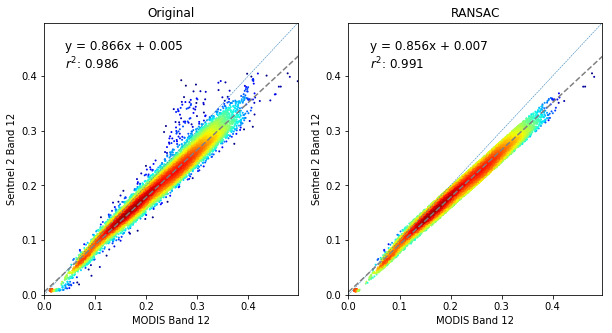

In [26]:
import pylab as plt
from matplotlib import gridspec,cm, colors
mval = np.nanmax([m_fed, s_fed])
fig, [ax, ax1] = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
xy = np.vstack([m_fed, s_fed])
kde = gaussian_kde(xy)(xy)
ax.scatter(m_fed, s_fed, c=kde, s=4, edgecolor='',\
           norm=colors.LogNorm(vmin=kde.min(), vmax=kde.max()*1.2), cmap = plt.cm.jet,rasterized=True)
ax.plot([0,1],[0.,1], '--',linewidth=0.5)
fit = np.polyfit(m_fed, s_fed,1)
fit_fn = np.poly1d(fit)
ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
slope,inter, rval, pval, std = scipy.stats.linregress(m_fed, s_fed)
if inter<0:
        ax.text(mval*(.5/6.),mval*(5./6.),'y = %.03f'%(slope)+r"x" + ' - %.03f \n'%(-inter)+ r"${r^2}$"+': %.03f' %(rval), fontsize=12)
else:
    ax.text(mval*(.5/6.),mval*(5./6.),'y = %.03f'%(slope)+r"x" + ' + %.03f \n'%(inter)+ r"${r^2}$"+': %.03f' %(rval), fontsize=12)
ax.set_xlabel('MODIS Band 12')
ax.set_ylabel('Sentnel 2 Band 12')
ax.set_xlim(0,mval)
ax.set_ylim(0,mval)
ax.set_title('Original')


m_b12_in, s_b12_in, in_mask = ransaclin(m_fed, s_fed, residual_threshold=0.02)
xy = np.vstack([m_b12_in.ravel(), s_b12_in.ravel()])
kde = gaussian_kde(xy)(xy)
ax1.scatter(m_b12_in, s_b12_in, c=kde, s=4, edgecolor='',\
           norm=colors.LogNorm(vmin=kde.min(), vmax=kde.max()*1.2), cmap = plt.cm.jet,rasterized=True)
ax1.plot([0,1],[0.,1], '--',linewidth=0.5)
fit = np.polyfit(m_fed, s_fed,1)
fit_fn = np.poly1d(fit)
ax1.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
slope,inter, rval, pval, std = scipy.stats.linregress(m_b12_in.ravel(), s_b12_in.ravel())
if inter<0:
    ax1.text(mval*(.5/6.),mval*(5./6.),'y = %.03f'%(slope)+r"x" + ' - %.03f \n'%(-inter)+ r"${r^2}$"+': %.03f' %(rval), fontsize=12)
else:
    ax1.text(mval*(.5/6.),mval*(5./6.),'y = %.03f'%(slope)+r"x" + ' + %.03f \n'%(inter)+ r"${r^2}$"+': %.03f' %(rval), fontsize=12)
ax1.set_xlabel('MODIS Band 12')
ax1.set_ylabel('Sentnel 2 Band 12')
ax1.set_xlim(0,mval)
ax1.set_ylim(0,mval)
ax1.set_title('RANSAC')

Since we use B12 get the optimized PSF parameters then we can apply it to other bands as well.

In [93]:
g = gdal.Open(psf.s2_dir+'10meter.vrt')
data= g.GetVirtualMemArray()
b2,b3,b4,b8 = data
g1 = gdal.Open(psf.s2_dir+'20meter.vrt')
data1 = g1.GetVirtualMemArray()
b8a, b11, b12 = data1[-3:,:,:]
img = dict(zip(psf.bands, [b2,b3,b4,b8, b11, b12, b8a]))

In [ ]:
brdf, qa = get_brdf_six(psf.Lfile, angles=psf.angles, bands=(3,4,1,2,6,7,2), Linds=list(psf.L_inds))

In [165]:
slops = [ 1.06946607,  1.03048916,  1.04039226,  1.00163932,  1.00010918, 0.95607606,  0.99951677]
offs = [ 0.0035921 , -0.00142761, -0.00383504, -0.00558762, -0.00570695, 0.00861192,  0.00188871]

xstd,ystd,angle, xs, ys = 2.64711833e+01,   3.89492334e+01,  -9.70168469e+00, 3.83169748e+01,   4.17068126e+01
m_mask = np.all(~brdf.mask,axis=0 ) & np.all(qa<=psf.qa_thresh, axis=0)
s_mask = ~psf.bad_pixs[psf.Hx, psf.Hy]
shifted_mask = np.logical_and.reduce(((psf.Hx+int(xs)>=psf.patch[1]),
                                      (psf.Hx+int(xs)<(psf.patch[1]+psf.patch[3])), 
                                      (psf.Hy+int(ys)>=psf.patch[0]),
                                      (psf.Hy+int(ys)<(psf.patch[0]+psf.patch[2]))))
mask = m_mask & s_mask & shifted_mask
x_ind, y_ind = psf.Hx + int(xs)- psf.patch[1], psf.Hy + int(ys) - psf.patch[0]

ker = psf.gaussian(xstd,ystd,angle,True) 
cor_bands = {}
for i, band in enumerate(psf.bands):
    if band in ['B11', 'B12', 'B8A']:
        image = np.repeat(np.repeat(img[band], 2, axis=1), 2, axis=0) 
    else:
        image = img[band]
    conved = signal.fftconvolve(image, ker, mode='same')
    sb = conved[x_ind[mask], y_ind[mask]]
    mb = brdf[i][mask]
    m_fed, s_fed = slops[i]*mb+offs[i], sb*0.0001
    cor_bands[band] = [m_fed, s_fed]

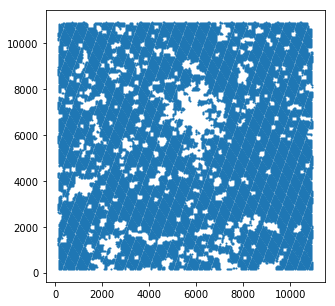

In [157]:
plt.figure(figsize=(5,5))
plt.plot(x_ind[mask], y_ind[mask], 'o', ms=1)

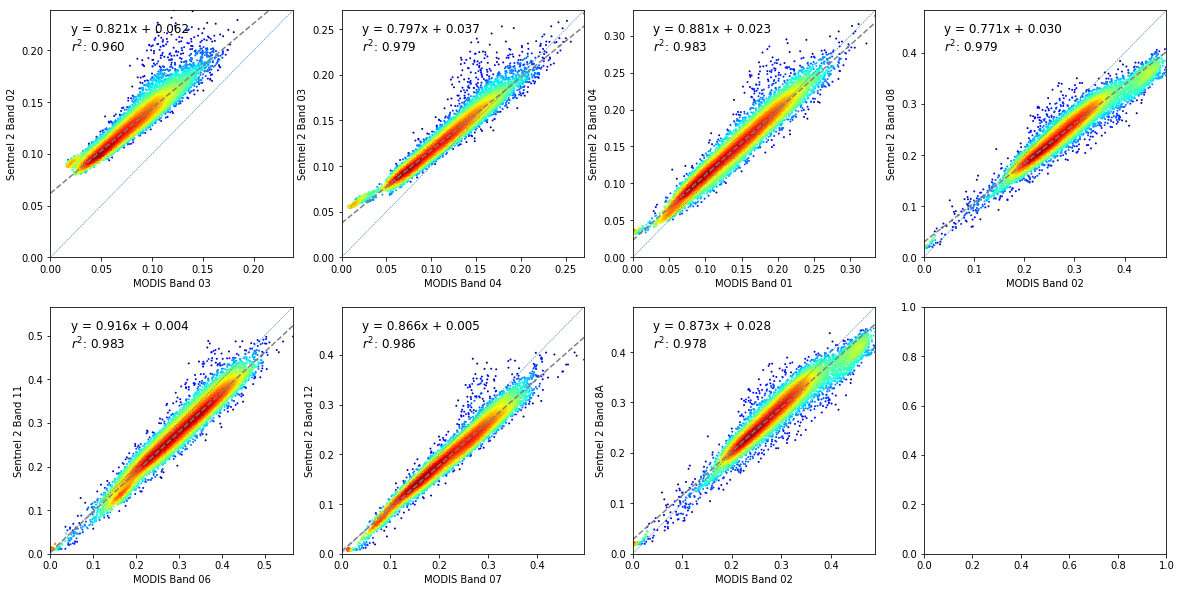

In [97]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
ax = ax.ravel()
modis_bands = [3,4,1,2,6,7,2] 
for i, band in enumerate(psf.bands):
    m_fed, s_fed = cor_bands[band]
    mval = np.nanmax([m_fed, s_fed])
    xy = np.vstack([m_fed, s_fed])
    kde = gaussian_kde(xy)(xy)
    ax[i].scatter(m_fed, s_fed, c=kde, s=4, edgecolor='',\
               norm=colors.LogNorm(vmin=kde.min(), vmax=kde.max()*1.2), cmap = plt.cm.jet,rasterized=True)
    ax[i].plot([0,1],[0.,1], '--',linewidth=0.5)
    fit = np.polyfit(m_fed, s_fed,1)
    fit_fn = np.poly1d(fit)
    ax[i].plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    slope,inter, rval, pval, std = scipy.stats.linregress(m_fed, s_fed)
    if inter<0:
        ax[i].text(mval*(.5/6.),mval*(5./6.),'y = %.03f'%(slope)+r"x" + ' - %.03f \n'%(-inter)+ r"${r^2}$"+': %.03f' %(rval), fontsize=12)
    else:
        ax[i].text(mval*(.5/6.),mval*(5./6.),'y = %.03f'%(slope)+r"x" + ' + %.03f \n'%(inter)+ r"${r^2}$"+': %.03f' %(rval), fontsize=12)
    ax[i].set_xlabel('MODIS Band %02d'%modis_bands[i])
    ax[i].set_ylabel('Sentnel 2 Band %s'%band.split('B')[-1])
    ax[i].set_xlim(0,mval)
    ax[i].set_ylim(0,mval)

All close: True


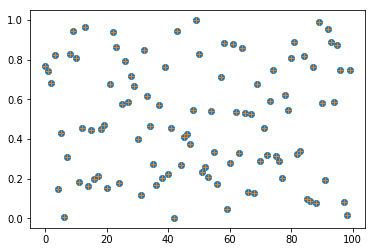

In [35]:
import numpy as np
from scipy.fftpack import dct, idct, fft, ifft
a = np.random.rand(100)
plt.plot(a, 'o')
plt.plot(idct(dct(a, norm='ortho'),norm='ortho'),'+')
print 'All close:', np.allclose(a, idct(dct(a, norm='ortho'),norm='ortho'))

In [5]:
s2_dir = '/home/ucfafyi/DATA/S2_MODIS/s_data/33/T/UL/2016/8/4/0/'

In [30]:
a = gdal.Open(s2_dir+'preview.jp2').ReadAsArray()[0]

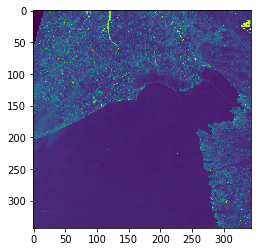

In [31]:
plt.imshow(a, interpolation='None')

In [32]:
%%time
f_b4 = dct(dct(a, norm='ortho', axis=1), norm='ortho', axis=0)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.34 ms


In [33]:
%%time
r_b4 = idct(idct(f_b4, norm='ortho', axis=1), norm='ortho', axis=0)

CPU times: user 5 ms, sys: 0 ns, total: 5 ms
Wall time: 4.28 ms


In [34]:
np.allclose(a, r_b4)

True

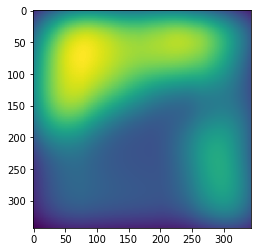

In [36]:
xstd,ystd,angle, xs, ys = 2.62092341e+01,   4.02422339e+01,  -1.18490845e+01, 4.79909374e+01,   3.96783358e+01

ker = psf.gaussian(xstd,ystd,angle,True)                              
conved = signal.fftconvolve(a, ker, mode='same')

plt.imshow(conved)

In [50]:
e_ker = np.zeros_like(a).astype(float)
e_ker[:ker.shape[0], :ker.shape[1]] = ker

In [51]:
f_ker = dct(dct(e_ker, axis=1, type=3, norm='ortho'), axis=0, type=3, norm='ortho')

In [52]:
f_b4 = dct(dct(a, norm='ortho', axis=1, type=3), norm='ortho', axis=0, type=3)
coved = idct(idct(f_b4*e_ker, axis=0,norm='ortho', type=3), axis=1,norm='ortho', type=3)

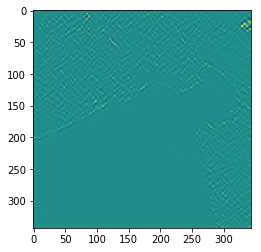

In [54]:
plt.imshow(coved)

In [56]:
a = np.random.rand(100)

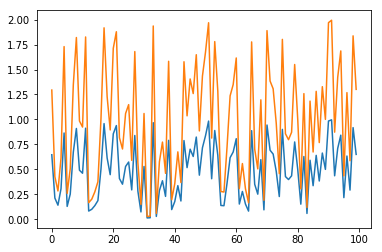

In [72]:
plt.plot(a)
plt.plot(idct(2.*dct(a, norm='ortho'), norm='ortho'))
#plt.plot(a)

In [84]:
ker = [1/3.,1/3.,1/3.]
conved = signal.fftconvolve(a, ker, mode='same')

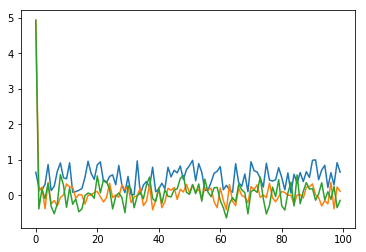

In [93]:
plt.plot(a)
plt.plot(np.fft.fft(a)/10.)
plt.plot(dct(a, norm='ortho'))
#plt.plot(conved)

In [163]:
M = np.zeros_like(a)
N = M.shape[0]
k = np.arange(N)
n =  k[:,None]
M = np.exp(-2j* np.pi * k * n / N)

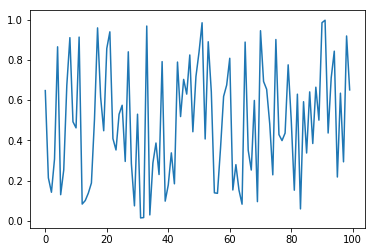

In [164]:
plt.plot(a)

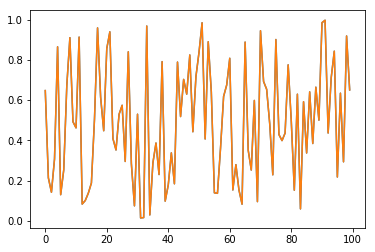

In [170]:
#plt.plot(fft(a))
M_i = M.copy()
M_i.imag = -1*M_i.imag 
plt.plot(a)
plt.plot(np.dot(np.dot(M, a), M_i)/N)